# Problem (2.54)

## Problem statement

Find the ground energy of the harmonic oscillator, to five significant digits, by the "wag-the-dog" method. That is, solve Equation 2.72 numerically, varying K until you get a wave function that goes to zero at large $\xi$.

----

## Solution

The Schrodinger Equation for the HO is given by equation 2.72

$$ \frac{d^2 \psi}{d \xi^2} = (\xi^2 - K) \psi $$

In [1]:
import numpy as np
from scipy.integrate import odeint

In [2]:
xi = np.linspace(0, 10, 400)

def func(y, xi, K):

    psi, psiprime = y
    
    psidoubleprime = (xi**2 - K)*psi
    
    return psiprime, psidoubleprime

In [3]:
y0 = (1.0, 0.0) #according to Fig 2.7a, the ground state is even so psi0 = 1, psi'0 = 0

result = odeint(func, y0, xi, args=(1.01,))

In [4]:
from matplotlib import pyplot as plt

In [5]:
%matplotlib inline

In [6]:
result.shape

(400, 2)

In [7]:
psi = result[:,0]

In [8]:
psiprime = result[:,1]

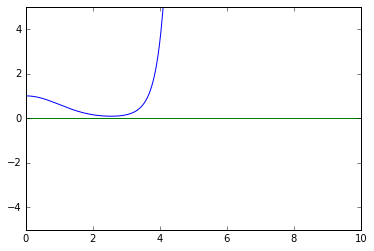

In [28]:
plt.plot(xi, psi)
plt.xlim(0,10)
plt.ylim(-5,5)
plt.plot(xi,np.zeros_like(xi))

Our energy is too high, lets try a lower one

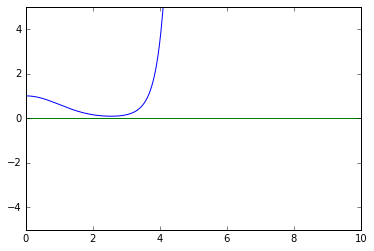

In [29]:
result = odeint(func, y0, xi, args=(0.99,))
psi = result[:,0]
plt.plot(xi, psi)
plt.xlim(0,10)
plt.ylim(-5,5)
plt.plot(xi,np.zeros_like(xi))

Now our energy is too low. Lets see if we can use the automated method. 

In [15]:
def bisect(func, E1, E2, even=True):
    """Given two ends of an energy interval, chop it in half."""
    
    xi = np.linspace(0, 10, 400)
    
    if even:
        y0 = (1.0, 0.0)
    else:
        y0 = (0.0, 1.0)
        
    # get initial signs
    res1 = odeint(func, y0, xi, args=(E1,))
    psi1 = res1[-1,0]
    
    res2 = odeint(func, y0, xi, args=(E2,))
    psi2 = res2[-1,0]
    
    Ehalf = (E1+E2)/2
    reshalf = odeint(func, y0, xi, args=(Ehalf,))
    psihalf = reshalf[-1, 0]
    
    if np.sign(psihalf) == np.sign(psi1):
        return (Ehalf, E2)
    else:
        return (E1, Ehalf)
    

def find_energy(func, E1, E2, even=True):
    
    while abs(E1-E2) > 1.0e-14:
        E1, E2 = bisect(func, E1, E2, even)
        
    if even:
        y0 = (1.0, 0.0)
    else:
        y0 = (0.0, 1.0)

    x = np.linspace(0, 10, 400)
    result = odeint(func, y0, xi, args=(E1, ))
    psi = result[:,0]
    plt.plot(xi, psi)
    plt.ylim(-5, 5)
    plt.xlim(0, 10)
    
    return E1

0.9999999596640283

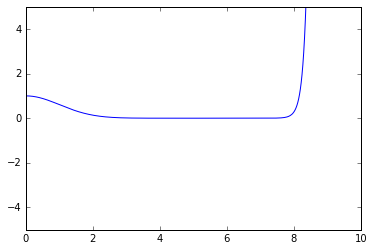

In [26]:
find_energy(func, 0.99, 1.01)

Not perfect but we know $K = 1$ for the ground state energy so this is good. 

For the Harmonic Oscillator $E_n = \hbar \omega (n + 1/2) $ and $K = 2E/\hbar\omega $, so this problem confirms that $E_0 = \hbar\omega/2$

----

## Portfolio references
* Problem 2.55, 2.56
## Index terms
* Harmonic Oscillator
* Shooting
## Book references
* eq 2.72
## External references
* Shooting.ipynb